## Importing Libraries

In [24]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import autokeras as ak

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [25]:
df = pd.read_csv("../cleaned_data/auto_mpg_fixed_cleaned.csv", index_col=0)
df.drop('origin', axis=1, inplace=True)

df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,27.0
394,4,97.0,52,2130,24.6,82,44.0
395,4,135.0,84,2295,11.6,82,32.0
396,4,120.0,79,2625,18.6,82,28.0


## Checking Data

<AxesSubplot:>

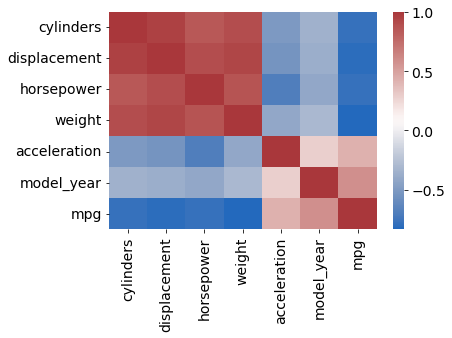

In [26]:
# Check to make sure that no columns have perfect colinearity
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [27]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.239362
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.159574
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.239362
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.186170
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.212766
...,...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.478723
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.930851
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.611702
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.505319


## Breaking Data in X and y

In [28]:
X = df.iloc[:,:-1]

In [29]:
y = df.iloc[:,-1]

# Generating Models

In [30]:
# Using AutoKeras output to help us tune our parameters
# Can adjust hyperpameters, activation functions, and layer stucture based on our findings

auto_tune = ak.StructuredDataRegressor(max_trials=10, 
                                       overwrite=True,
                                       loss='mean_squared_error',
                                       output_dim=1,
                                       project_name='auto_keras'
                                       )

X_train, X_test, y_train, y_test = train_test_split(X, y)

auto_tune.fit(X_train, y_train, validation_split = 0.15, epochs = 10)
y_hat = auto_tune.predict(X_test)
print(auto_tune.evaluate(X_test, y_test))

auto_tune_mod = auto_tune.export_model()
print(auto_tune_mod.summary())


Trial 10 Complete [00h 00m 03s]
val_loss: 0.02553376369178295

Best val_loss So Far: 0.004119144286960363
Total elapsed time: 00h 00m 30s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - lo

In [31]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 50

# Defining batch size
bs = 32

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [32]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [33]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0673
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0574
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0534
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 6/50
10/10 [==============================] - 0s 2ms/st

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          3.79e-135
Time:                        18

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


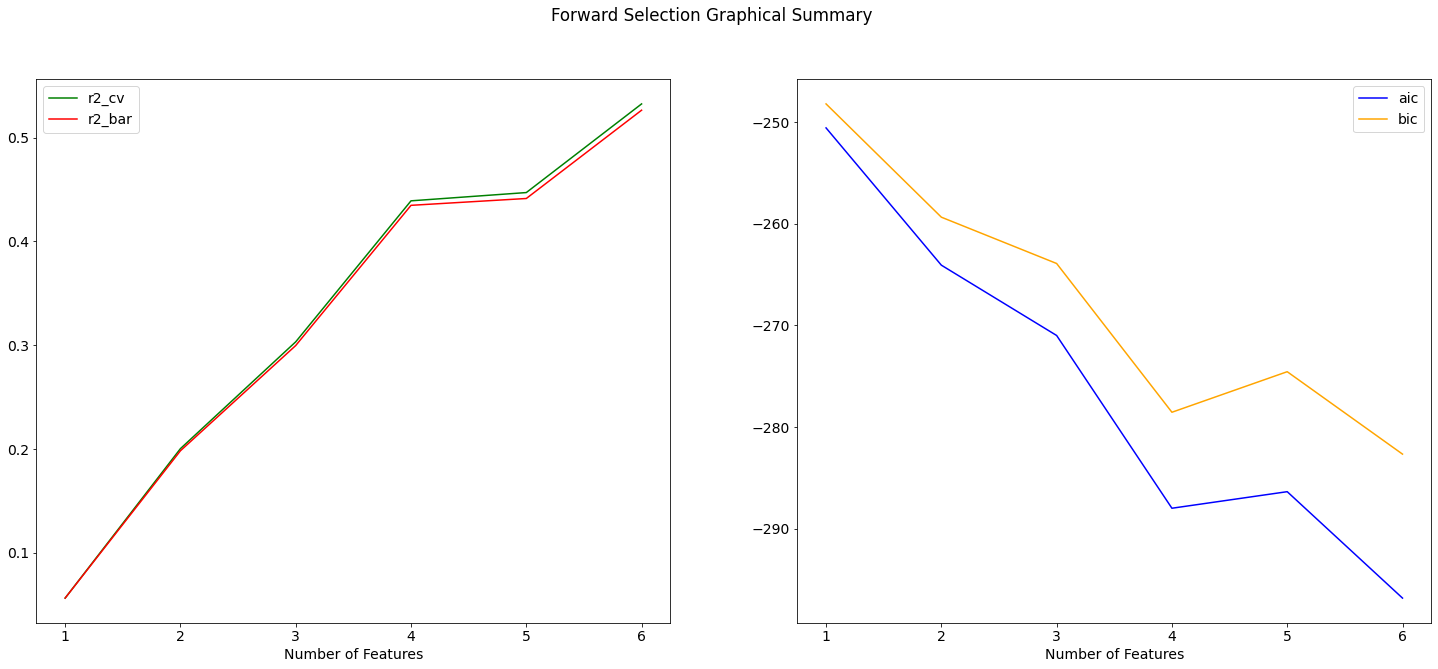

In [34]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [35]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [36]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 6)                 42        
                                                                 
 dense_75 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.3128
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2194
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1457
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0925
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0576
Epoch 6/50
10/10 [==============================] - 0s 1ms

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 6)                 42        
                                                                 
 dense_85 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          3.79e-135
Time:                        1

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


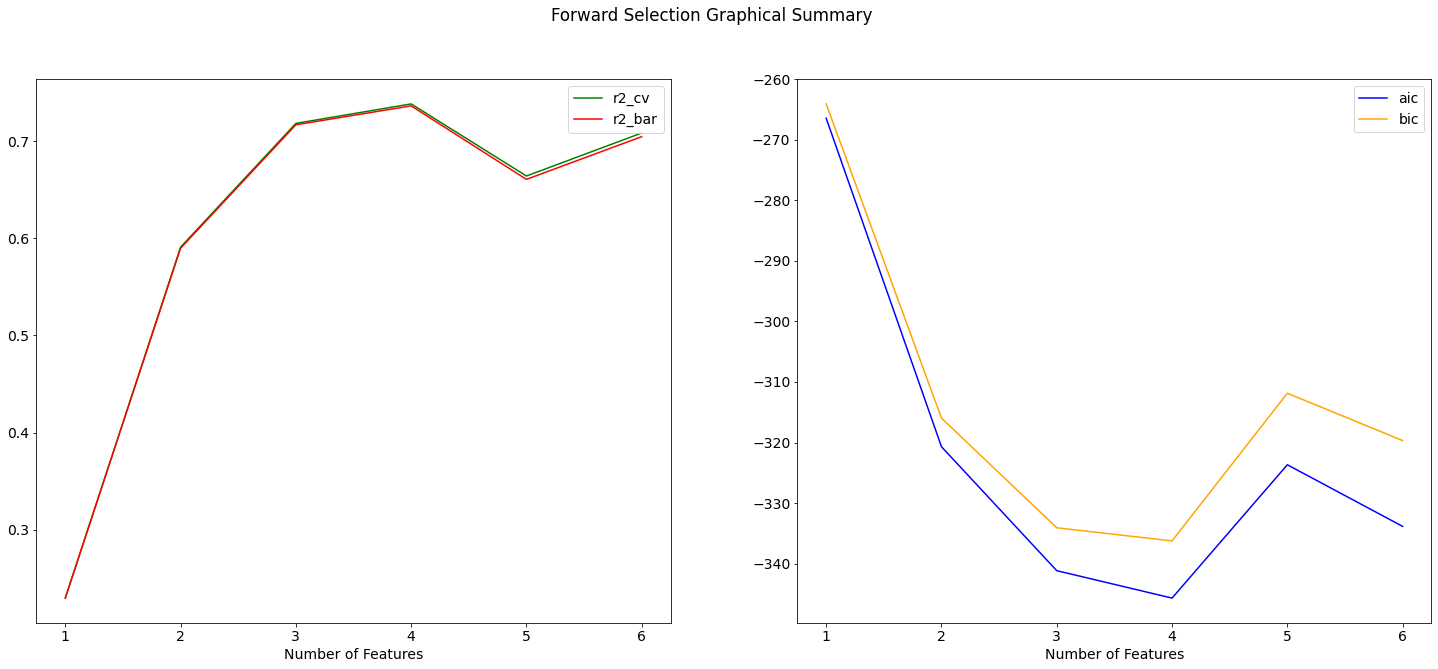

In [37]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [38]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The first value corresponds to the input layer
# The last value corresponds to the output layer
nur_list = [X.shape[1], 1]

# a_func is the activation function of choice
a_func = 'relu'

In [39]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 6)                 42        
                                                                 
 dense_147 (Dense)           (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1785
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1690
Epoch 5/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 6/50
10/10 [==============================] - 0s 1ms

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 6)                 42        
                                                                 
 dense_157 (Dense)           (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          3.79e-135
Time:                        1

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


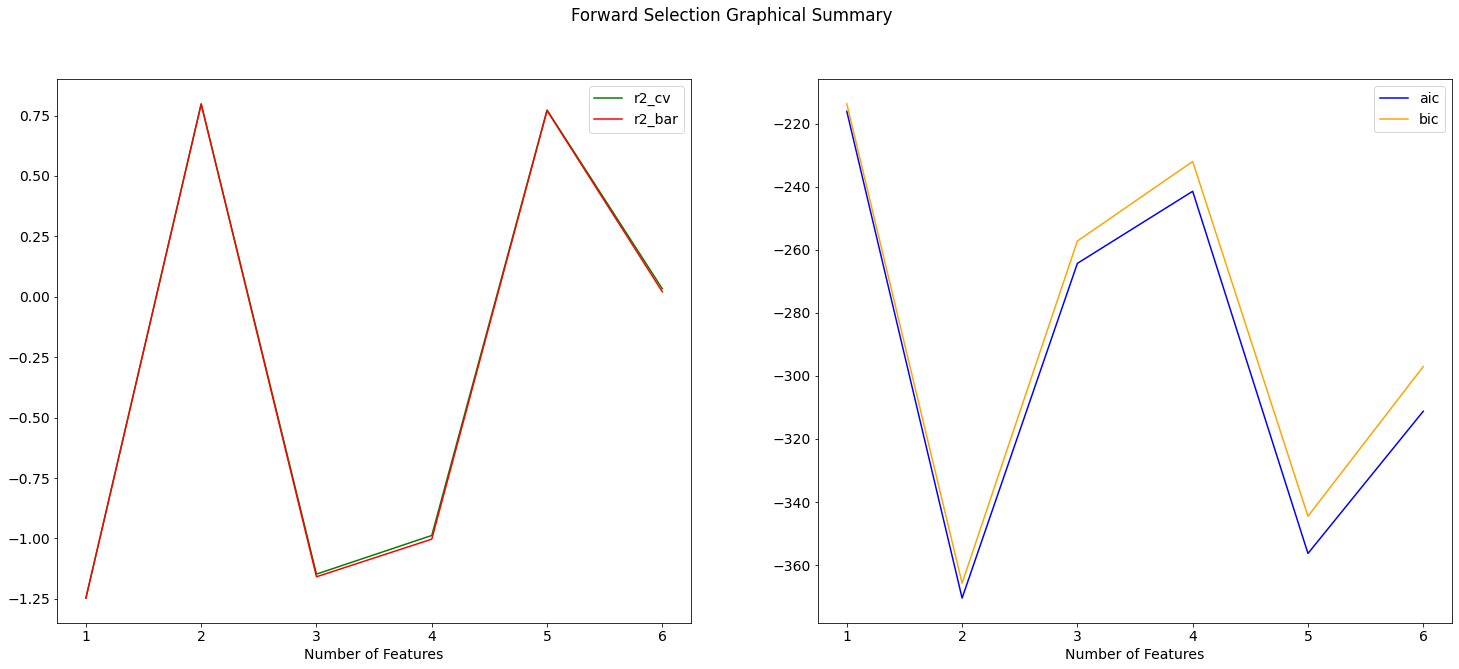

In [40]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [41]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [42]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 6)                 42        
                                                                 
 dense_219 (Dense)           (None, 13)                91        
                                                                 
 dense_220 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0869
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0749
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0578
Ep

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_233 (Dense)           (None, 6)                 42        
                                                                 
 dense_234 (Dense)           (None, 13)                91        
                                                                 
 dense_235 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


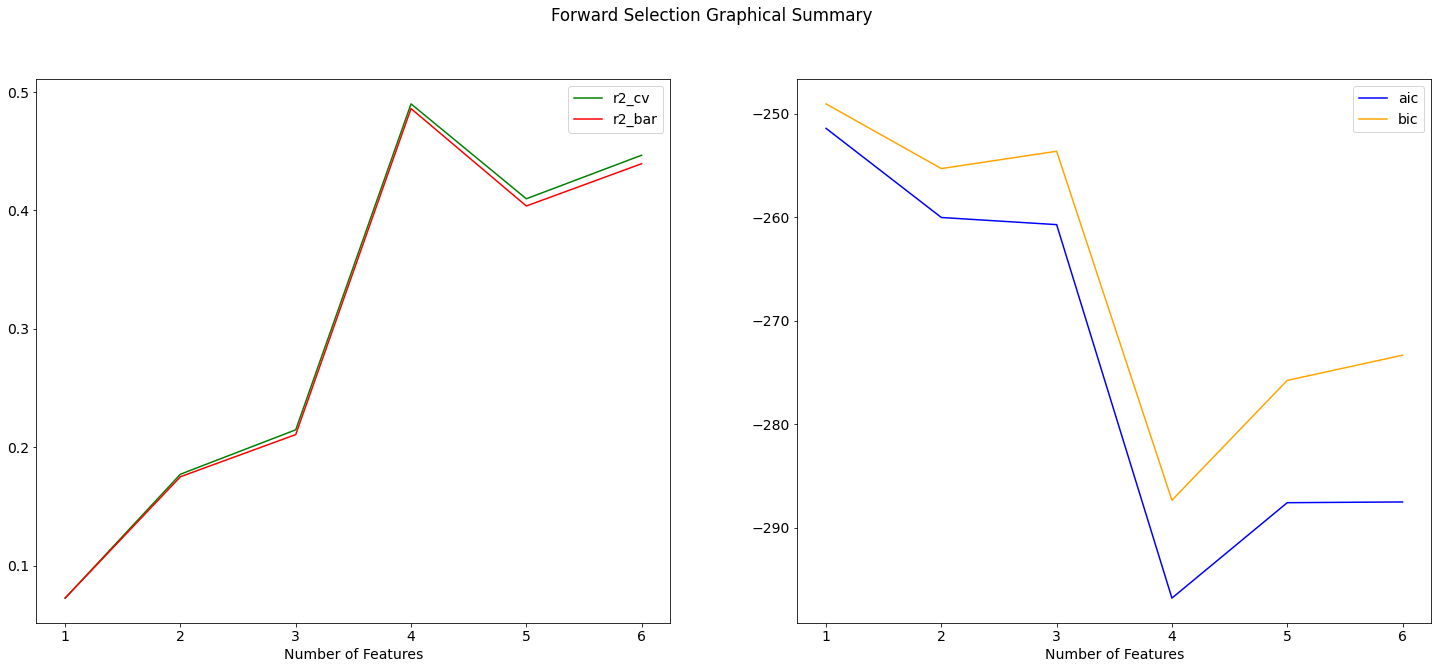

In [43]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [44]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [45]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_326 (Dense)           (None, 6)                 42        
                                                                 
 dense_327 (Dense)           (None, 13)                91        
                                                                 
 dense_328 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.2311
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1354
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0735
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0424
Ep

Model: "sequential_149"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_341 (Dense)           (None, 6)                 42        
                                                                 
 dense_342 (Dense)           (None, 13)                91        
                                                                 
 dense_343 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


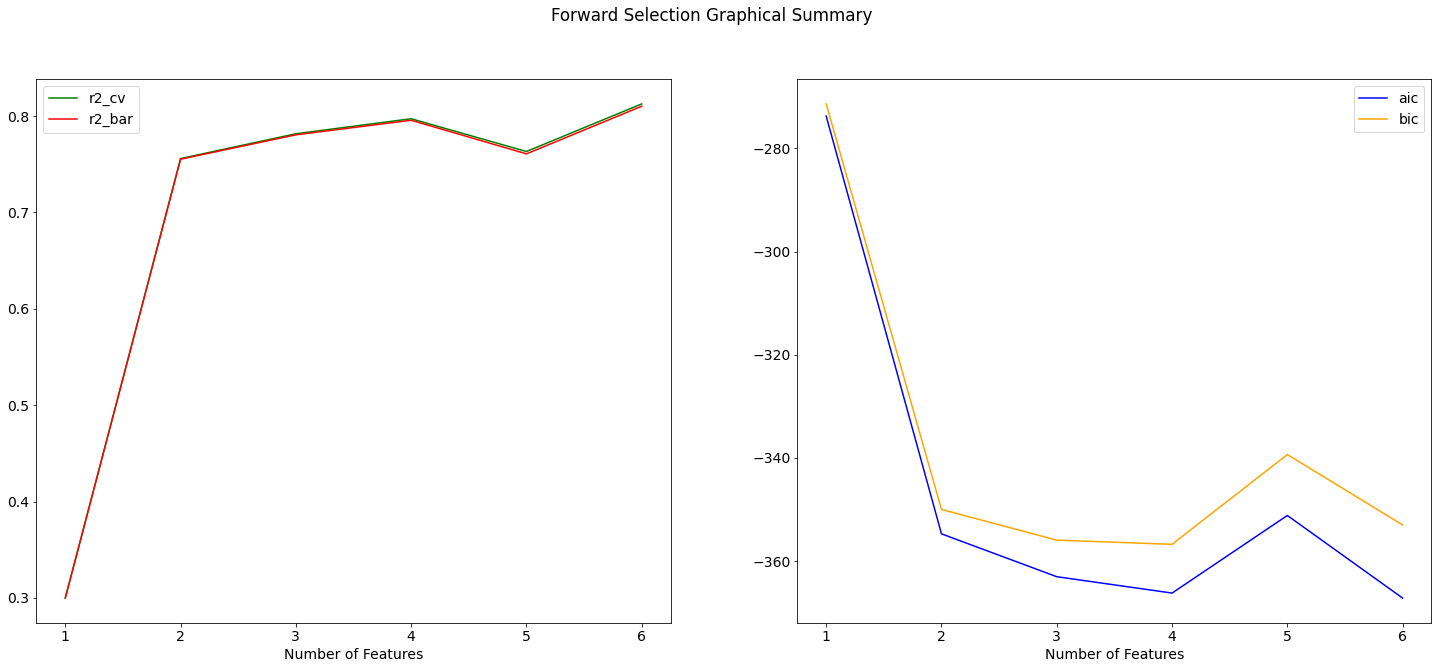

In [46]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [47]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 3 values in the list are neurons of first 3 layers.
# The first value corresponds to the input layer
# The middle value is the hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, 1]

# a_func is the activation function of choice
a_func = 'relu'

In [48]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_180"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_434 (Dense)           (None, 6)                 42        
                                                                 
 dense_435 (Dense)           (None, 13)                91        
                                                                 
 dense_436 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1601
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1385
Epoch 3/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1203
Epoch 4/50
10/10 [==============================] - 0s 1ms/step - loss: 0.1050
Ep

Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_449 (Dense)           (None, 6)                 42        
                                                                 
 dense_450 (Dense)           (None, 13)                91        
                                                                 
 dense_451 (Dense)           (None, 1)                 14        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic: 

c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


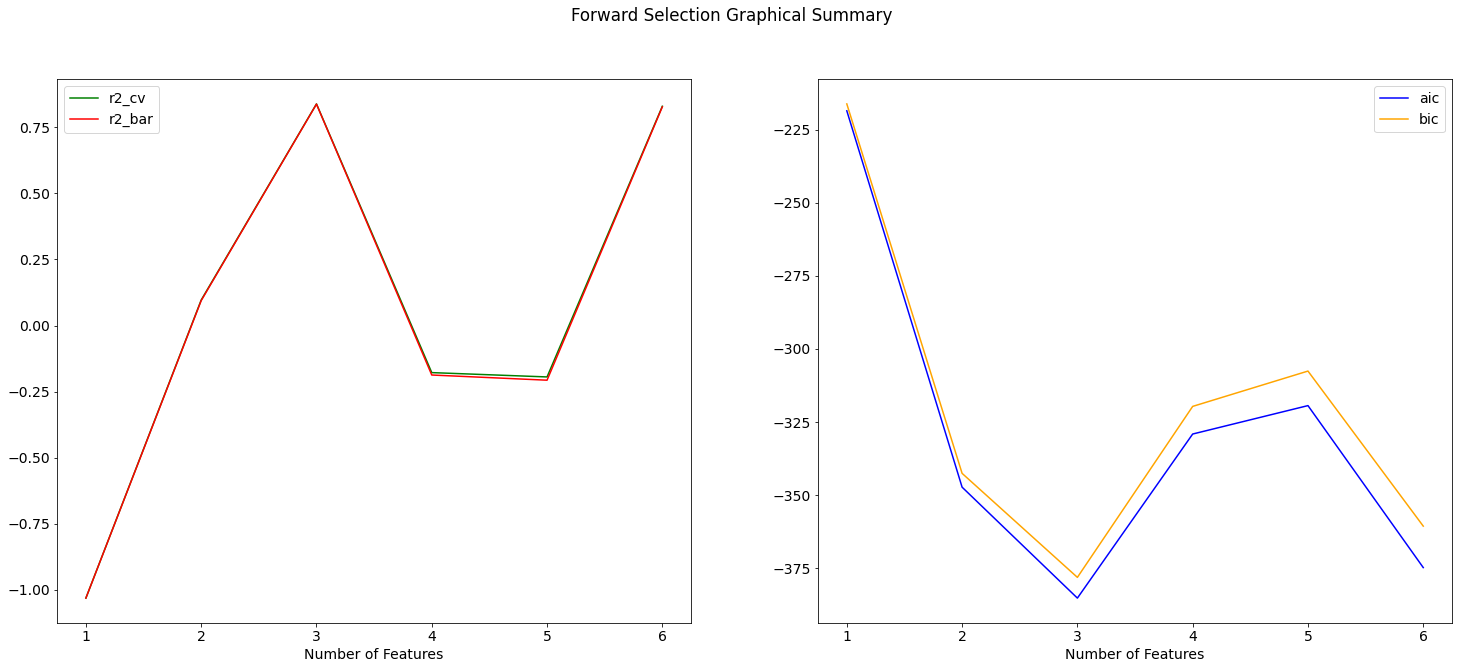

In [49]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 4 Layer Neural Networks

### Sigmoid Activation Function

In [50]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

In [51]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_216"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_542 (Dense)           (None, 6)                 42        
                                                                 
 dense_543 (Dense)           (None, 13)                91        
                                                                 
 dense_544 (Dense)           (None, 7)                 98        
                                                                 
 dense_545 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 3/50
10/10 [==========

Model: "sequential_221"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_562 (Dense)           (None, 6)                 42        
                                                                 
 dense_563 (Dense)           (None, 13)                91        
                                                                 
 dense_564 (Dense)           (None, 7)                 98        
                                                                 
 dense_565 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


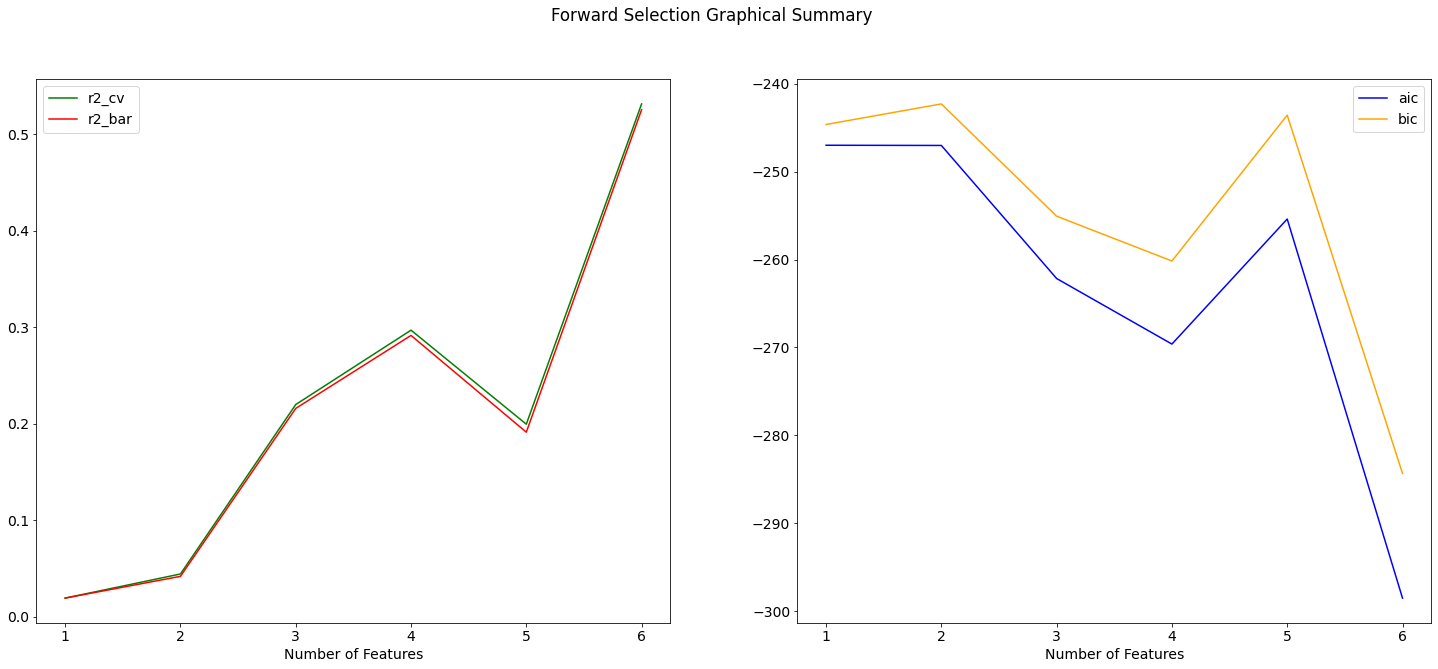

In [52]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [53]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'tanh'

In [54]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_252"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_686 (Dense)           (None, 6)                 42        
                                                                 
 dense_687 (Dense)           (None, 13)                91        
                                                                 
 dense_688 (Dense)           (None, 7)                 98        
                                                                 
 dense_689 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0797
Epoch 2/50
10/10 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 3/50
10/10 [==========

Model: "sequential_257"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_706 (Dense)           (None, 6)                 42        
                                                                 
 dense_707 (Dense)           (None, 13)                91        
                                                                 
 dense_708 (Dense)           (None, 7)                 98        
                                                                 
 dense_709 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


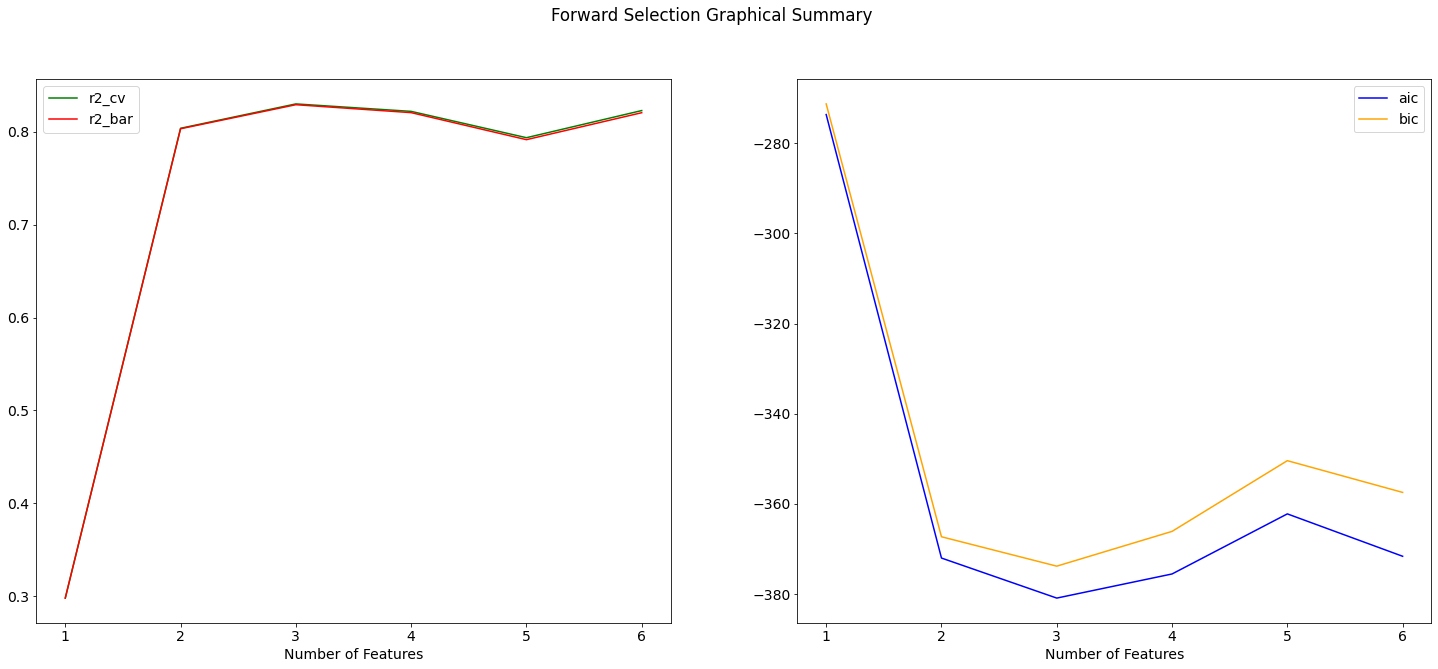

In [55]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [56]:
# nur_list is a list of number of neurons for each layer.
# In this case, the first 4 values in the list are neurons of first 4 layers.
# The first value corresponds to the input layer
# The middle values are hidden layers
# The last value corresponds to the output layer
nur_list = [X.shape[1], 2 * X.shape[1] + 1, math.ceil((2 * X.shape[1] + 1)/2), 1]

# a_func is the activation function of choice
a_func = 'relu'

In [57]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Model: "sequential_288"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_830 (Dense)           (None, 6)                 42        
                                                                 
 dense_831 (Dense)           (None, 13)                91        
                                                                 
 dense_832 (Dense)           (None, 7)                 98        
                                                                 
 dense_833 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.1882
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 3/50
10/10 [==========

Model: "sequential_293"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_850 (Dense)           (None, 6)                 42        
                                                                 
 dense_851 (Dense)           (None, 13)                91        
                                                                 
 dense_852 (Dense)           (None, 7)                 98        
                                                                 
 dense_853 (Dense)           (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________

FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809


c:\Users\spenc\Desktop\UGA_projects\data_science\DS2_P2\python\Model_Parent_2.py:318: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


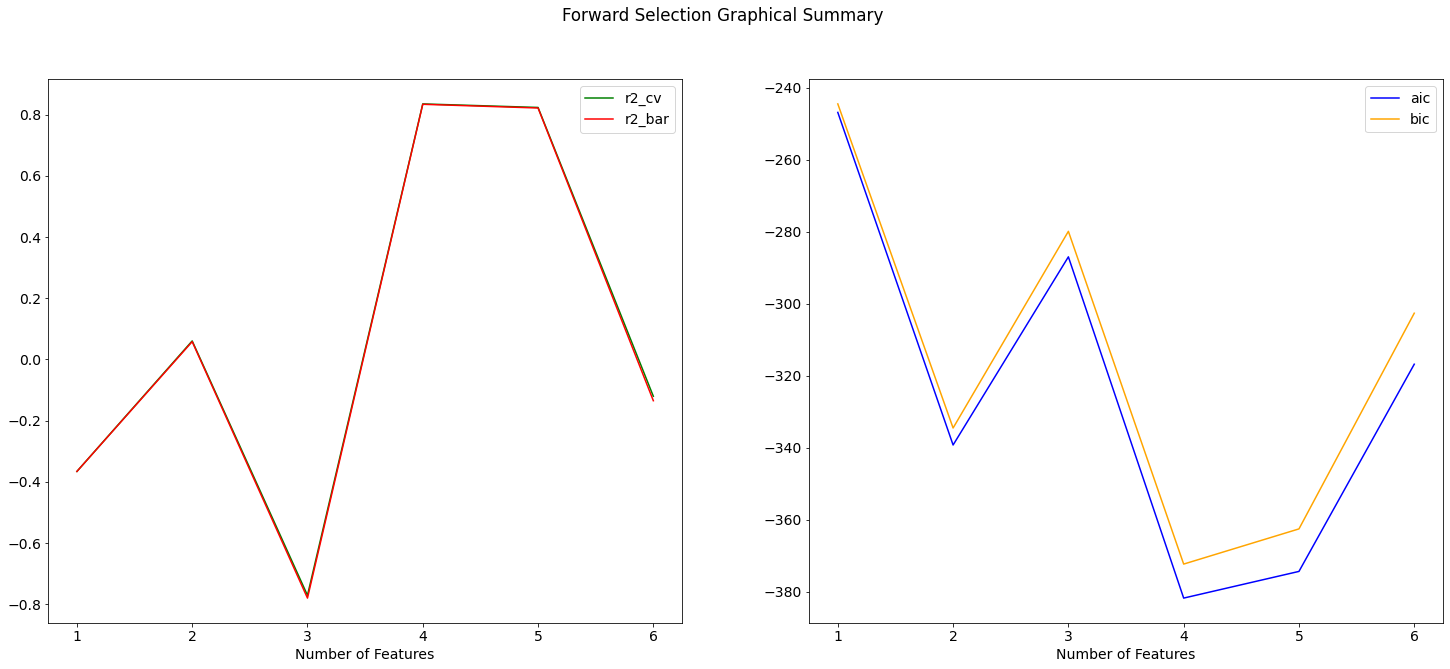

In [58]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)